In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#create subframes for easier exploration
df = pd.read_csv('fakestudentrecords.csv')
df_csgpa = df[['Q1_CS_GPA', 'Q2_CS_GPA','Q3_CS_GPA','Q4_CS_GPA','Q5_CS_GPA']]
df_totgpa = df[['Q1_Overall_GPA', 'Q2_Overall_GPA','Q3_Overall_GPA','Q4_Overall_GPA','Q5_Overall_GPA']]
df_csunits = df[['Q1_CS_Units','Q2_CS_Units', 'Q3_CS_Units', 'Q4_CS_Units', 'Q5_CS_Units']]



In [2]:
#THINGS TO EXPLORE

#1. understand typical amount of units a student would take compared to the total units they would take (done through checking mean units taken throughout the quarters and finding relationships)
#3. understand the trend of GPA between the means, with the CS and normal GPA (Done)
#3. understand relations between CS GPA and the CS units (Done)
#4. group by quarter and check the trend of GPAs in the recent quarters through boxplots, discussing outliers and such
#5. Draw up correlation heatmap and see the potential issues (done)
#6. Discuss training a model that can predict future outcomes given enough data

In [3]:
#analysis of column names and such

print(df.columns)
print(df.head)

Index(['StudentID', 'Q1_Timestamp', 'Q1_CS_GPA', 'Q1_Overall_GPA',
       'Q1_CS_Units', 'Q1_Total_Units', 'Q2_Timestamp', 'Q2_CS_GPA',
       'Q2_Overall_GPA', 'Q2_CS_Units', 'Q2_Total_Units', 'Q3_Timestamp',
       'Q3_CS_GPA', 'Q3_Overall_GPA', 'Q3_CS_Units', 'Q3_Total_Units',
       'Q4_Timestamp', 'Q4_CS_GPA', 'Q4_Overall_GPA', 'Q4_CS_Units',
       'Q4_Total_Units', 'Q5_Timestamp', 'Q5_CS_GPA', 'Q5_Overall_GPA',
       'Q5_CS_Units', 'Q5_Total_Units'],
      dtype='object')
<bound method NDFrame.head of     StudentID  Q1_Timestamp  Q1_CS_GPA  Q1_Overall_GPA  Q1_CS_Units  \
0           1        202308       3.25            3.22           11   
1           2        202108       2.77            2.68            8   
2           3        202203       3.73            3.68           13   
3           4        202208       2.70            3.07           12   
4           5        202108       3.37            3.40            9   
5           6        202401       3.16            3.08     

Mean units over all quarters:
        Q1_CS_Units  Q2_CS_Units  Q3_CS_Units  Q4_CS_Units  Q5_CS_Units
count    50.000000    50.000000    50.000000    50.000000    50.000000
mean     12.240000    11.640000    11.840000    11.720000    12.260000
std       2.832465     2.701171     2.452487     2.157474     2.761322
min       8.000000     8.000000     8.000000     8.000000     8.000000
25%       9.250000     9.000000    10.000000    10.000000    10.250000
50%      12.500000    11.000000    12.000000    12.000000    12.000000
75%      15.000000    13.000000    13.000000    13.000000    15.000000
max      16.000000    16.000000    16.000000    16.000000    16.000000 

Mean total units over all quarters:
        Q1_Total_Units  Q2_Total_Units  Q3_Total_Units  Q4_Total_Units  \
count       50.000000       50.000000       50.000000       50.000000   
mean        14.520000       13.500000       13.740000       13.900000   
std          3.315025        2.922468        3.015673        2.270036   

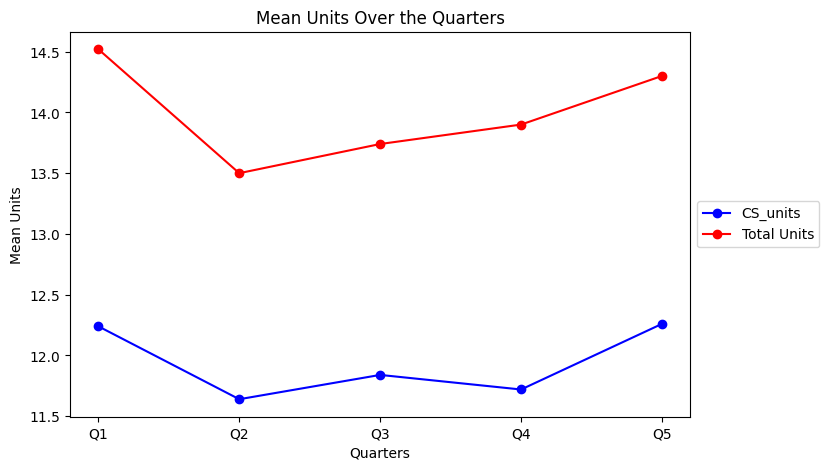

In [4]:
# Explore percentiles of CS units taken from quarter to quarter
cs_unit_sum = df[['Q1_CS_Units', 'Q2_CS_Units', 'Q3_CS_Units', 'Q4_CS_Units', 'Q5_CS_Units']].describe()
tot_unit_sum = df[['Q1_Total_Units', 'Q2_Total_Units', 'Q3_Total_Units', 'Q4_Total_Units', 'Q5_Total_Units']].describe()


# Calculate and print the mean CS units over all quarters
mean_cs_units = df[['Q1_CS_Units', 'Q2_CS_Units', 'Q3_CS_Units', 'Q4_CS_Units', 'Q5_CS_Units']].mean()
print("Mean units over all quarters:\n", cs_unit_sum, '\n')

#calculate and print the mean of all units over all quarters
mean_units = df[['Q1_Total_Units', 'Q2_Total_Units', 'Q3_Total_Units', 'Q4_Total_Units', 'Q5_Total_Units']].mean()
print("Mean total units over all quarters:\n", tot_unit_sum, '\n')


quarters = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
#plot the trend of mean CS units over all quarters
plt.figure(figsize=(8, 5))
plt.plot(quarters, mean_cs_units.values, marker='o', linestyle='-', color='b', label = 'CS_units')
plt.plot(quarters, mean_units.values, marker = 'o', linestyle ='-', color = 'r', label = 'Total Units')
plt.title('Mean Units Over the Quarters')
plt.xlabel('Quarters')
plt.ylabel('Mean Units')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

In [5]:
'''
Analysis:
1. Discuss why we used the mean as the metric, since there are no clear outliers (found from checking IQR and distribution).
2. Discuss findings, downtrend in Q2, CS almost consistent from Q2-Q4 while total units grows suggesting exploration of otehr classes / GEs, then upturn in CS units while continuing the uptrend in units, suggesting larger amounts of coursework.

'''

'\nAnalysis:\n1. Discuss why we used the mean as the metric, since there are no clear outliers (found from checking IQR and distribution).\n2. Discuss findings, downtrend in Q2, CS almost consistent from Q2-Q4 while total units grows suggesting exploration of otehr classes / GEs, then upturn in CS units while continuing the uptrend in units, suggesting larger amounts of coursework.\n\n'

Text(0, 0.5, 'GPA')

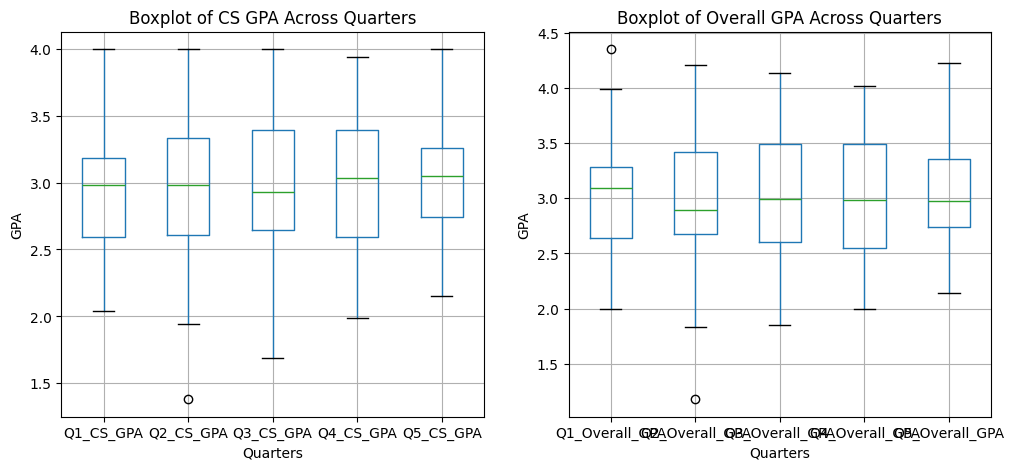

In [6]:
#Now, we can cross reference the above graph with the trend in GPAs for both CS related courses versus cumulative course GPA.
#Check whether we must use the mean or median as the metric for our representation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df_csgpa.boxplot(ax=axes[0])
axes[0].set_title('Boxplot of CS GPA Across Quarters')
axes[0].set_xlabel('Quarters')
axes[0].set_ylabel('GPA')

df_totgpa.boxplot(ax=axes[1])
axes[1].set_title('Boxplot of Overall GPA Across Quarters')
axes[1].set_xlabel('Quarters')
axes[1].set_ylabel('GPA')

In [7]:
'''Analysis:
Things to look for when determining to use the mean or median:

1. If the plot is symmetric(tails and IQR of similar lengths), the distribution is symmetric, meaning that the mean is a good representation for the data
2. If there are multiple outliers (dots beyond the tails), we can consider using the median as the metric instead. 

Conclusion:
In this case, since generally GPAs tend to have more outliers and can be skewed from quarter to quarter, 
using background knowledge combined with the presence of a few outliers in the tables shown above, we will consider the medians of both sets to compare. 

Interesting Points:
Aside from deciding the metric, the box plot shows us many important factors. For example, the trend of distribution is the same between both GPAs, where the spread of GPAs tightens in Q1 and Q5, while spreading out more between the two.
This showcases the idea of Academic 

'''

'Analysis:\nThings to look for when determining to use the mean or median:\n\n1. If the plot is symmetric(tails and IQR of similar lengths), the distribution is symmetric, meaning that the mean is a good representation for the data\n2. If there are multiple outliers (dots beyond the tails), we can consider using the median as the metric instead. \n\nConclusion:\nIn this case, since generally GPAs tend to have more outliers and can be skewed from quarter to quarter, \nusing background knowledge combined with the presence of a few outliers in the tables shown above, we will consider the medians of both sets to compare. \n\nInteresting Points:\nAside from deciding the metric, the box plot shows us many important factors. For example, the trend of distribution is the same between both GPAs, where the spread of GPAs tightens in Q1 and Q5, while spreading out more between the two.\nThis showcases the idea of Academic \n\n'

Summary of GPA statistics for CS GPA: 
        Q1_CS_GPA  Q2_CS_GPA  Q3_CS_GPA  Q4_CS_GPA  Q5_CS_GPA
count  50.000000  50.000000  50.000000   50.00000  50.000000
mean    2.961600   2.929600   3.005000    3.03280   3.055600
std     0.457327   0.545205   0.525463    0.49633   0.415575
min     2.040000   1.380000   1.690000    1.99000   2.150000
25%     2.592500   2.605000   2.647500    2.59500   2.740000
50%     2.980000   2.985000   2.930000    3.03500   3.050000
75%     3.187500   3.335000   3.395000    3.39250   3.260000
max     4.000000   4.000000   4.000000    3.94000   4.000000


Summary of GPA statistics for Overall GPA 
        Q1_Overall_GPA  Q2_Overall_GPA  Q3_Overall_GPA  Q4_Overall_GPA  \
count       50.000000       50.000000       50.000000       50.000000   
mean         2.979200        2.953400        3.001200        3.022800   
std          0.503351        0.564991        0.557555        0.532465   
min          2.000000        1.180000        1.850000        2.000000   


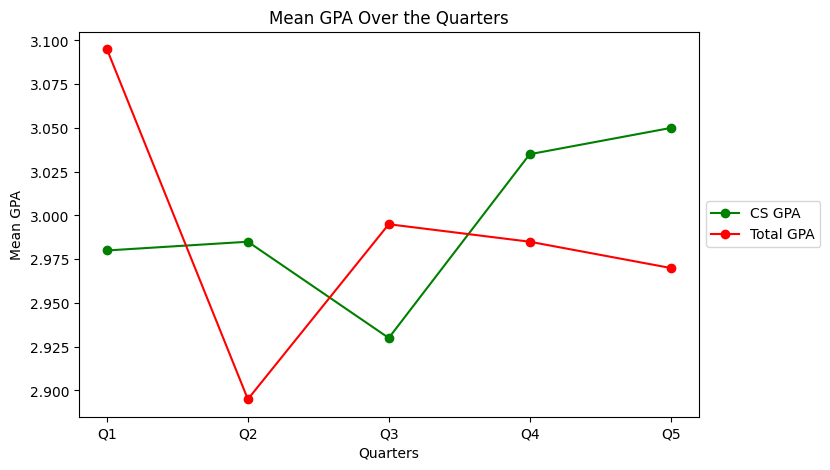

In [8]:
#Now, we can cross reference the above graph with the trend in GPAs for both CS related courses versus cumulative course GPA.

med_cs_gpa = df[['Q1_CS_GPA', 'Q2_CS_GPA', 'Q3_CS_GPA', 'Q4_CS_GPA', 'Q5_CS_GPA']].median()
cs_summary = df[['Q1_CS_GPA', 'Q2_CS_GPA', 'Q3_CS_GPA', 'Q4_CS_GPA', 'Q5_CS_GPA']].describe()


print("Summary of GPA statistics for CS GPA: \n", cs_summary)
print('\n')

med_tot_gpa = df[['Q1_Overall_GPA', 'Q2_Overall_GPA', 'Q3_Overall_GPA', 'Q4_Overall_GPA', 'Q5_Overall_GPA']].median()
tot_summary = mean_tot_gpa = df[['Q1_Overall_GPA', 'Q2_Overall_GPA', 'Q3_Overall_GPA', 'Q4_Overall_GPA', 'Q5_Overall_GPA']].describe()
print("Summary of GPA statistics for Overall GPA \n", tot_summary)


#We can now compare these trends to the original graph:
quarters = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
plt.figure(figsize=(8, 5))
plt.plot(quarters, med_cs_gpa.values, marker='o', linestyle='-', color='g', label = 'CS GPA')
plt.plot(quarters, med_tot_gpa.values, marker='o', linestyle='-', color='r', label = 'Total GPA')

plt.title('Mean GPA Over the Quarters')
plt.xlabel('Quarters')
plt.ylabel('Mean GPA')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



In [9]:
'''
Analysis:

#1: The CS GPA remains relatively stable across the quarters, with a slight dip in Q2 but gradually increasing from Q3 to Q5.
#2: The Total GPA shows a more significant fluctuation, with a sharp decline from Q1 to Q2 and then stabilizing around Q3 before slightly dropping again in Q5.
#3: There is a notable drop in the Total GPA in Q2, while the CS GPA remained consistent. This suggests a particularly difficult quarter for non-CS courses or possibly a general academic challenge during the students second quarter at the university.
This does not suggest that the student is taking more non-CS courses due to the stability of the relationship between CS and total units on average, suggesting that the quarter itself, timestamped as the winter quarter for most, is the most difficult for all students in the university. 
#4: Even as the CS GPA rises from Q4-Q5, the Total GPA remains to decrease on average, emphasizing the difficulty of non-CS courses for GE requirements.  

'''

'\nAnalysis:\n\n#1: The CS GPA remains relatively stable across the quarters, with a slight dip in Q2 but gradually increasing from Q3 to Q5.\n#2: The Total GPA shows a more significant fluctuation, with a sharp decline from Q1 to Q2 and then stabilizing around Q3 before slightly dropping again in Q5.\n#3: There is a notable drop in the Total GPA in Q2, while the CS GPA remained consistent. This suggests a particularly difficult quarter for non-CS courses or possibly a general academic challenge during the students second quarter at the university.\nThis does not suggest that the student is taking more non-CS courses due to the stability of the relationship between CS and total units on average, suggesting that the quarter itself, timestamped as the winter quarter for most, is the most difficult for all students in the university. \n#4: Even as the CS GPA rises from Q4-Q5, the Total GPA remains to decrease on average, emphasizing the difficulty of non-CS courses for GE requirements.  \

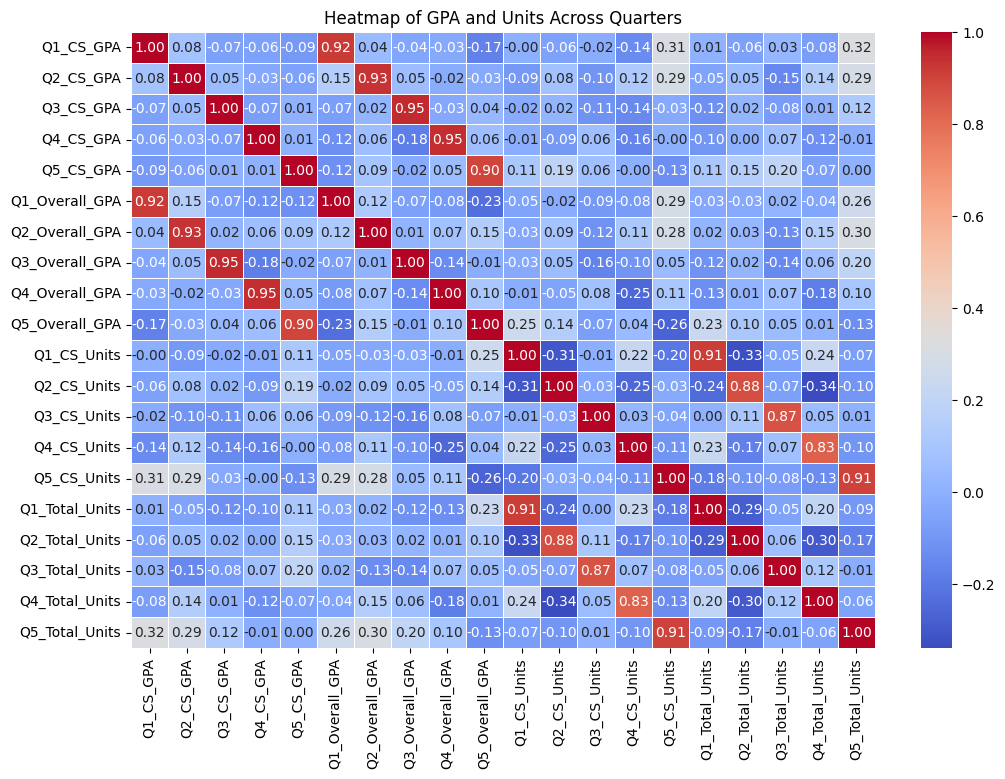

In [12]:
#Now, we can draw up a heatmap and explore the correlations within the data. 

#Pull the relevant features
df_heatmap = df[['Q1_CS_GPA', 'Q2_CS_GPA','Q3_CS_GPA','Q4_CS_GPA','Q5_CS_GPA','Q1_Overall_GPA', 'Q2_Overall_GPA','Q3_Overall_GPA','Q4_Overall_GPA','Q5_Overall_GPA','Q1_CS_Units','Q2_CS_Units', 'Q3_CS_Units', 'Q4_CS_Units', 'Q5_CS_Units','Q1_Total_Units', 'Q2_Total_Units', 'Q3_Total_Units', 'Q4_Total_Units', 'Q5_Total_Units']]

correlation_matrix = df_heatmap.corr()


plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adding a title
plt.title('Heatmap of GPA and Units Across Quarters')

# Display the heatmap
plt.show()

In [ ]:
'''
Analysis:

#1: As expected, we see the highest correlations between the number of Total and CS units, and between the CS and Total GPAs of students.
#2: There is a weak correlation between the number of Units taken and the respective GPA for that quarter, which is interesting. We see that for CS_GPA for example, across all quarters the highest relation between the GPA and the Units is 0.16,
suggesting that the number of CS units taken does not directly influence GPA. 
#3: We also see no apparent correlation of GPA between the quarters, which suggests that the trend is not indicated through the students last quarter performance, and is independent.  
#4: we do see a slight correlation between the number of Total Units taken per quarter, as evidenced by the -0.3 correlation between Q2_Total_Units and Q4_Total_Units. While this correlation seems insignificant(below 0.5),
it gives us insight into the students workload management. Since Q2 tends to be the quarter with the lowest GPAs, it is within the bounds to suggest that the amount of units taken in Q4 is inverse to the amount taken in Q2 (usually less in Q4).
'''